<a href="https://colab.research.google.com/github/ThatManRong/RL_Thesis/blob/main/AAPL_Data_RL_HeatMap_Jan18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Read Data

In [59]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
from scipy.io import loadmat
import math
import statistics
import os

dataDir = '/content/drive/My Drive/Colab Notebooks/AAL/'
mats = []
for file in os.listdir( dataDir ) :
    mats.append(loadmat( dataDir+file ) )

#master_file_midprice = [0 for i in range(len(mat[i])*len(mats))]

# count = 0
# for i in range(len(mats)):

#   lob = mats[i]['LOB']
#   SellPrice = lob['SellPrice']
#   BuyPrice = lob['BuyPrice']
#   for j in range(234000):
#     master_file_midprice[count+j] = (sum(SellPrice[0][0][j]) + sum(BuyPrice[0][0][j]))/(2*20)
#   count = count + 234000

In [61]:
import numpy as np
master_BuyPrice = []
master_SellPrice = []
master_NumberBuyOrder = []
master_NumberSellOrder = []
master_VolumeMO = []
master_BuyVolume = []
master_SellVolume = []
master_NumberMO = []
#master_time = []
for i in range(len(mats)):
  #master_time.append(np.array(mats[i]['data']['EventTime'][0][0]))
  master_BuyPrice.append(np.array(mats[i]['data']['BuyPrice'][0][0]))
  master_SellPrice.append(np.array(mats[i]['data']['SellPrice'][0][0]))
  master_NumberBuyOrder.append(np.array(mats[i]['data']['NumberMO'][0][0][0]))   #Buy order
  master_NumberSellOrder.append(np.array(mats[i]['data']['NumberMO'][0][0][1]))   #Sell order
  master_NumberMO.append(np.array(mats[i]['data']['NumberMO'][0][0]))
  master_VolumeMO.append(np.array(mats[i]['data']['VolumeMO'][0][0]))
  master_BuyVolume.append(np.array(mats[i]['data']['BuyVolume'][0][0]))
  master_SellVolume.append(np.array(mats[i]['data']['SellVolume'][0][0]))
#sellVolume = np.array(mats[i]['data']['SellVolume'][0][0])

In [62]:
def clear_master(master):
  result = master
  for i in range(len(master)):
    if len(master[i]) != 23400:
      print(len(master[i]))
      del result[i]
  return result

In [68]:
abc = clear_master(master_BuyPrice)
abc = clear_master(master_SellPrice)
abc = clear_master(master_NumberMO)
abc = clear_master(master_BuyVolume)
abc = clear_master(master_SellVolume)

In [69]:
def flatten_master(master, price_indicator):
  if price_indicator == True:
    result = []
    for i in range(len(master)):
      #print('Percent Done: ', i/len(master))
      for j in range(len(master[0])-1):
        #for k in range(len(master[0][0])):
        result.append((master[i][j][0]-master[i][0][0])/10000)   #Price difference between spot price and price of the beginning. 
  if price_indicator == False:
    result = []
    for i in range(len(master)):
      for j in range(len(master[0])-1):
        #for k in range(len(master[0][0])):
        result.append(master[i][j][0])
  return result

In [70]:
flattened_BuyPrice = flatten_master(clear_master(master_BuyPrice), price_indicator = True) 
flattened_SellPrice = flatten_master(master_SellPrice, price_indicator = True) 
flattened_NumberBuyOrder = flatten_master(clear_master(master_NumberMO), price_indicator = False) 
flattened_NumberBuyVolume = flatten_master(clear_master(master_BuyVolume), price_indicator = False) 
flattened_NumberSellVolume = flatten_master(clear_master(master_SellVolume), price_indicator = False) 

In [71]:
print(len(master_BuyPrice))

248


In [72]:
timestamp = []
for i in range(len(clear_master(master_BuyPrice))):
  for j in range(len(master_BuyPrice[0])-1):
    timestamp.append(j)

In [ ]:
print(len(timestamp))
print(len(flattened_BuyPrice))
print(len(flattened_SellPrice))
print(len(flattened_NumberBuyOrder))
print(len(flattened_NumberBuyVolume))

In [73]:
flattened_MidPrice = []
for i in range(len(flattened_BuyPrice)):
  flattened_MidPrice.append(0.5*flattened_BuyPrice[i]+0.5*flattened_SellPrice[i])

In [ ]:
import pandas as pd
data = {'Time': timestamp, 
        'BuyPrice': flattened_BuyPrice,
        'SellPrice' : flattened_SellPrice,
        #'NumberBuyOrder': flattened_NumberBuyOrder,
        'BuyVolume': flattened_NumberBuyVolume,
        'SellVolume': flattened_NumberSellVolume,
        'MidPrice': flattened_MidPrice}
  
# Convert the dictionary into DataFrame 
data = pd.DataFrame(data) 
print(data)

In [ ]:
def normalize_0_1(flattened):
  result = []
  max = np.max(flattened)
  min = np.min(flattened)
  for elem in flattened:
    result.append((elem - max)/(max-min))
  return result

def normalize_Z(flattened):
  result = []
  std = np.std(flattened)
  mean = np.mean(flattened)
  for elem in flattened:
    result.append((elem - mean)/std)
  return result

In [ ]:
normalized_BuyPrice = normalize_0_1(flattened_BuyPrice)
normalized_SellPrice = normalize_0_1(flattened_SellPrice)
normalized_BuyVolume = normalize_0_1(flattened_NumberBuyVolume)
normalized_SellVolume = normalize_0_1(flattened_NumberSellVolume)
normalized_MidPrice = normalize_0_1(flattened_MidPrice)

In [ ]:
import pandas as pd
normalized_data = {'Time': timestamp, 
        'BuyPrice': normalized_BuyPrice,
        'SellPrice' : normalized_SellPrice,
        #'NumberBuyOrder': flattened_NumberBuyOrder,
        'BuyVolume': normalized_BuyVolume,
        'SellVolume': normalized_SellVolume,
        'MidPrice': normalized_MidPrice}
  
# Convert the dictionary into DataFrame 
normalized_data = pd.DataFrame(normalized_data) 
print(normalized_data)

In [ ]:
normalized_BuyPrice = normalize_Z(flattened_BuyPrice)
normalized_SellPrice = normalize_Z(flattened_SellPrice)
normalized_BuyVolume = normalize_Z(flattened_NumberBuyVolume)
normalized_SellVolume = normalize_Z(flattened_NumberSellVolume)
normalized_MidPrice = normalize_Z(flattened_MidPrice)

In [ ]:
import pandas as pd
normalized_data = {'Time': timestamp, 
        # 'BuyPrice': normalized_BuyPrice,
        # 'SellPrice' : normalized_SellPrice,
        #'NumberBuyOrder': flattened_NumberBuyOrder,
        'BuyVolume': normalized_BuyVolume,
        'SellVolume': normalized_SellVolume,
        'MidPrice': normalized_MidPrice}
  
# Convert the dictionary into DataFrame 
normalized_data = pd.DataFrame(normalized_data) 
print(normalized_data)

In [ ]:
import matplotlib.pyplot as plt

plt.hist(normalized_MidPrice, color = 'blue', edgecolor = 'black',
         bins = 20)

In [ ]:
split_ratio = 0.8 #80% as train set. 
split_point = int(251*0.8)*23400
train_data = normalized_data[:split_point]
test_data = normalized_data[split_point:]
len(train_data),len(test_data)

In [ ]:
def reduce_outlier_effect(df):
  temp = df
  temp.loc[temp["BuyVolume"] > 3, "BuyVolume"] = 3.0
  temp.loc[temp["BuyVolume"] < -3, "BuyVolume"] = -3.0
  temp.loc[temp["SellVolume"] > 3, "SellVolume"] = 3.0
  temp.loc[temp["SellVolume"] < -3, "SellVolume"] = -3.0
  temp.loc[temp["MidPrice"] > 3, "MidPrice"] = 3.0
  temp.loc[temp["MidPrice"] < -3, "MidPrice"] = -3.0
  return temp

def split_into_days(df,timestamp):
  days = []
  record = 0
  for i in range(len(timestamp)-1):
    if timestamp[i]>timestamp[i+1]:
      days.append(df.iloc[record:i+1])
      record = i+1
  return days
      


In [ ]:
normalized_data = reduce_outlier_effect(normalized_data)
# normalized_data

In [ ]:
splitted_normalized_data = split_into_days(normalized_data,timestamp)

In [ ]:
print(len(splitted_normalized_data))

In [ ]:
print(list(splitted_normalized_data[0]['BuyVolume']))

#Pooling

Use average pooling to reduce length of time series. 

In [74]:
def pooling(df, pooling_factor):
  temp = df.iloc[len(df)%pooling_factor:]
  pooled_BuyVolume = []
  pooled_SellVolume = []
  pooled_MidPrice = []
  pooled_timestamp = []
  for i in range(int(len(temp)/pooling_factor)-1):
    pooled_BuyVolume.append(np.mean(list(df['BuyVolume'])[i*pooling_factor:(i+1)*pooling_factor]))
    pooled_SellVolume.append(np.mean(list(df['SellVolume'])[i*pooling_factor:(i+1)*pooling_factor]))
    pooled_MidPrice.append(np.mean(list(df['MidPrice'])[i*pooling_factor:(i+1)*pooling_factor]))
    pooled_timestamp.append(i)
  
  result = {'Time': pooled_timestamp, 
        #'BuyPrice': normalized_BuyPrice,
        #'SellPrice' : normalized_SellPrice,
        #'NumberBuyOrder': flattened_NumberBuyOrder,
        'BuyVolume': pooled_BuyVolume,
        'SellVolume': pooled_SellVolume,
        'MidPrice': pooled_MidPrice}
  result = pd.DataFrame(result) 

  return result

    

In [ ]:
something = pooling(splitted_normalized_data[0],10)

In [ ]:
pooled_splitted_normalized_data = []
for dataset in splitted_normalized_data:
  pooled_splitted_normalized_data.append(pooling(dataset,10))

#CNN Autoencoder: 

Here I use CNN to encode input time series

In [ ]:
from keras.layers import Input, Dense, Conv1D, MaxPooling1D, UpSampling1D, BatchNormalization, LSTM, RepeatVector
from keras.models import Model
from keras.models import model_from_json
from keras import regularizers
import datetime
import time
import requests as req
import json
import pandas as pd
import pickle
import os
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [ ]:
train_data_autoencoder = splitted_normalized_data[0]   #Use only 1 month of data for training autoencoder b/c memory crash. 
test_data_autoencoder = splitted_normalized_data[1]

In [ ]:
#startdate="01/01/2015"
window_length = 23399
encoding_dim = 10000
epochs = 100
test_samples = 2000

In [ ]:
MidPrice_train = np.array([train_data_autoencoder['MidPrice'].values[i-window_length:i].reshape(-1, 1) for i in tqdm(range(window_length+1,len(train_data_autoencoder['MidPrice'])))])
# BuyVolume_train = np.array([train_data_autoencoder['BuyVolume'].values[i-window_length:i].reshape(-1, 1) for i in tqdm(range(window_length+1,len(train_data_autoencoder['BuyVolume'])))])
# SellVolume_train = np.array([train_data_autoencoder['SellVolume'].values[i-window_length:i].reshape(-1, 1) for i in tqdm(range(window_length+1,len(train_data_autoencoder['SellVolume'])))])
MidPrice_test = np.array([test_data_autoencoder['MidPrice'].values[i-window_length:i].reshape(-1, 1) for i in tqdm(range(window_length+1,len(test_data_autoencoder['MidPrice'])))])
# BuyVolume_test = np.array([test_data_autoencoder['BuyVolume'].values[i-window_length:i].reshape(-1, 1) for i in tqdm(range(window_length+1,len(test_data_autoencoder['BuyVolume'])))])
# SellVolume_test = np.array([test_data_autoencoder['SellVolume'].values[i-window_length:i].reshape(-1, 1) for i in tqdm(range(window_length+1,len(test_data_autoencoder['SellVolume'])))])

In [ ]:
# input_window = Input(shape=(window_length,1))
# x = Conv1D(16, 20, activation="relu", padding="same")(input_window) # 10 dims
# #x = BatchNormalization()(x)
# x = MaxPooling1D(2, padding="same")(x) # 5 dims
# x = Conv1D(1, 20, activation="relu", padding="same")(x) # 5 dims
# #x = BatchNormalization()(x)
# encoded = MaxPooling1D(2, padding="same")(x) # 3 dims

# encoder = Model(input_window, encoded)

# # 3 dimensions in the encoded layer

# x = Conv1D(1, 10000, activation="relu", padding="same")(encoded) # 3 dims
# #x = BatchNormalization()(x)
# x = UpSampling1D(2)(x) # 6 dims
# x = Conv1D(16, 50, activation='relu')(x) # 5 dims
# #x = BatchNormalization()(x)
# x = UpSampling1D(2)(x) # 10 dims
# decoded = Conv1D(1, 50, activation='sigmoid', padding='same')(x) # 10 dims
# autoencoder = Model(input_window, decoded)
# autoencoder.summary()

# autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
# history = autoencoder.fit(train_data_autoencoder, train_data_autoencoder,
#                 epochs=epochs,
#                 batch_size=1,
#                 shuffle=True,
#                 validation_data=(test_data_autoencoder, test_data_autoencoder))

# decoded_stocks = autoencoder.predict(test_data_autoencoder)

In [ ]:
x_train_deep = MidPrice_train.reshape((len(MidPrice_train), int(np.prod(MidPrice_train.shape[1:]))))
x_test_deep = MidPrice_test.reshape((len(MidPrice_test), int(np.prod(MidPrice_test.shape[1:]))))

input_window = Input(shape=(window_length,))

x = Dense(15000, activation='relu')(input_window)
x = BatchNormalization()(x)
encoded = Dense(encoding_dim, activation='relu')(x)
# "decoded" is the lossy reconstruction of the input

x = Dense(15000, activation='relu')(encoded)
x = BatchNormalization()(x)
decoded = Dense(window_length, activation='sigmoid')(x)

# this model maps an input to its reconstruction
autoencoder = Model(input_window, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_window, encoded)

autoencoder.summary()

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
history = autoencoder.fit(x_train_deep, x_train_deep,
                epochs=epochs,
                batch_size=1024,
                shuffle=True,
                validation_data=(x_test_deep, x_test_deep))

decoded_stocks = autoencoder.predict(x_test_deep)

#Training (With added feature)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import copy
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import torch.nn.functional as F
from plotly import tools
from plotly.graph_objs import *
from plotly.offline import init_notebook_mode, iplot, iplot_mpl

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.plot(flattened_MidPrice, linewidth=0.1)
plt.xlabel('$t$')
plt.ylabel('$Price$')
fig.tight_layout()
plt.show()

In [ ]:
print(pooled_splitted_normalized_data[0])
fig = plt.figure(figsize=(10,5))

plt.plot(pooled_splitted_normalized_data[10]['MidPrice'], linewidth=1)


In [ ]:
class Environment2:
    
    def __init__(self, data, history_t = 10):
        self.data = data    #State variables. 
        self.history_t = history_t
        self.reset()
        
    def reset(self):
        self.t = 0
        self.done = False
        self.profits = 0
        self.positions = []
        self.position_value = 0
        self.history = [0 for _ in range(self.history_t)]
        return [self.position_value] + self.history # obs
    
    def step(self, act):
        reward = 0

        # act = 0: sell, 
        #1: stay, 
        #2: buy
        if (self.t + 1 ==len(self.data)-1):
          act == 0
        max_holding = 10
        if act == 2:
            if len(self.positions)>=max_holding:
              reward = -1
            else:
              self.positions.append(self.data.iloc[self.t, :]['MidPrice'])
        elif act == 0: # sell
            if len(self.positions) == 0:
                reward = -1
            else:
                profits = 0
                for p in self.positions:
                    profits += (self.data.iloc[self.t, :]['MidPrice'] - p)
                reward += profits
                self.profits += profits
                self.positions = []

        if len(self.positions)>=max_holding:
          reward = -1
        # set next time
        self.t += 1
        #print(self.t)
        # if self.t == 49 and self.positions != [] and act != 2:
        #   reward = -1
        self.position_value = 0
        for p in self.positions:
            self.position_value += (self.data.iloc[self.t, :]['MidPrice'] - p)
        self.history.pop(0)
        self.history.append(self.data.iloc[self.t, :]['MidPrice'] - 0)
        if (self.t==len(self.data)-1):
            self.done=True
            #self.positions = []
            #act = 2   #Force selling at end of period

        # if self.done and self.positions != []:
        #   reward = -1
        # clipping reward
        if reward > 0:
            reward = 1
        elif reward < 0:
            reward = -1
        #print ("t={%d}, done={%str}"%(self.t,self.done))
        #actual_action = act
        return [self.position_value] + self.history, reward, self.done, self.positions # obs, reward, done

In [ ]:
class Q_Network(nn.Module):
        
    def __init__(self,obs_len,hidden_size,actions_n):
            
        super(Q_Network,self).__init__()
            
        self.fc_val = nn.Sequential(
            nn.Linear(obs_len, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, actions_n)
        )
        
        
    def forward(self,x):
        h =  self.fc_val(x)
        return (h)

hidden_size=20
input_size=11
output_size=3
USE_CUDA = False
LR = 0.001
Q = Q_Network(input_size, hidden_size, output_size)
Q_ast = copy.deepcopy(Q)
if USE_CUDA:
    Q = Q.cuda()
    print("using Cuda")
loss_function = nn.MSELoss()
optimizer = optim.Adam(list(Q.parameters()), lr=LR)


In [ ]:
#epoch_num = 20
memory_size = 40000
batch_size = 2000
#gamma = 0.99

memory = []
total_step = 0
total_rewards = []
total_losses = []
epsilon = 1.0
epsilon_decrease = 1e-3
epsilon_min = 0.01
start_reduce_epsilon = 200
train_freq = 10
update_q_freq = 20
gamma = 0.999
show_log_freq = 20
repeat = 5

In [ ]:
print(train_data.iloc[0:23400])

In [ ]:
master_reward = []
#start = time.time()
for epoch in range(200):
    epoch_data = pooled_splitted_normalized_data[epoch]
    print("Percentage done: ", 100*epoch/200)
    #epoch_data = pd.DataFrame(epoch_data) 
    env = Environment2(epoch_data)
    step_max = len(env.data)-1
    for i in range(repeat):
      pobs = env.reset()
      step = 0
      done = False
      total_reward = 0
      total_loss = 0
      iterations = []
      log_rewards = []
      log_losses = []
      iteration = 1
      #trading_history = []
      while not done and step < step_max:
          #if done:
          #  trading_history = []  #For pair trading, make sure the stock
          # select action
          pact = np.random.randint(3)
          if np.random.rand() > epsilon:  #Epsilon greedy Exploration
              pact = Q(torch.from_numpy(np.array(pobs, dtype=np.float32).reshape(1, -1)))
              pact = np.argmax(pact.data)
              pact = pact.numpy()
          # if step == step_max - 1:
          #   pact = 2
          # act
          obs, reward, done, inventory = env.step(pact)
          #print("Step max is: ", step_max, "Inventory is: ", inventory)
          # if done is True:
          #     print("action is: ", actual_action, "  Reward is: ", reward, "  Done? ", done)

          # add memory
          memory.append((pobs, pact, reward, obs, done))
          #memory.append((pobs, actual_action, reward, obs, done))
          if len(memory) > memory_size:
              memory.pop(0)

          # train or update q
          if len(memory) == memory_size:
              if total_step % train_freq == 0:
                  shuffled_memory = np.random.permutation(memory)
                  memory_idx = range(len(shuffled_memory))
                  for i in memory_idx[::batch_size]:
                      batch = np.array(shuffled_memory[i:i+batch_size])
                      b_pobs = np.array(batch[:, 0].tolist(), dtype=np.float32).reshape(batch_size, -1)
                      b_pact = np.array(batch[:, 1].tolist(), dtype=np.int32)
                      b_reward = np.array(batch[:, 2].tolist(), dtype=np.int32)
                      b_obs = np.array(batch[:, 3].tolist(), dtype=np.float32).reshape(batch_size, -1)
                      b_done = np.array(batch[:, 4].tolist(), dtype=np.bool)

                      q = Q(torch.from_numpy(b_pobs))
                      q_ = Q_ast(torch.from_numpy(b_obs))
                      maxq = np.max(q_.data.numpy(),axis=1)
                      target = copy.deepcopy(q.data)
                      for j in range(batch_size):
                          target[j, b_pact[j]] = b_reward[j]+gamma*maxq[j]*(not b_done[j])
                      Q.zero_grad()
                      loss = loss_function(q, target)
                      total_loss += loss.data.item()
                      loss.backward()
                      optimizer.step()
                      
              if total_step % update_q_freq == 0:
                  Q_ast = copy.deepcopy(Q)
                  
              # epsilon
              if epsilon > epsilon_min and total_step > start_reduce_epsilon:
                  epsilon -= epsilon_decrease

              # next step
              total_reward += reward
              pobs = obs
              step += 1
              total_step += 1

          total_rewards.append(total_reward)
          master_reward.append(total_rewards)
          total_losses.append(total_loss)

          if (epoch+1) % show_log_freq == 0:
              
              iterations.append(iteration)
              iteration += 1
              log_reward = sum(total_rewards[((epoch+1)-show_log_freq):])/show_log_freq
              log_rewards.append(log_reward)
              log_loss = sum(total_losses[((epoch+1)-show_log_freq):])/show_log_freq
              log_losses.append(log_loss)
              #elapsed_time = time.time()-start
              print('\t'.join(map(str, [epoch+1, epsilon, total_step, log_reward, log_loss])))
              #start = time.time()

#Data Processing (Old State)

In [75]:
import pandas as pd
data = {'Time': timestamp, 
        # 'BuyPrice': flattened_BuyPrice,
        # 'SellPrice' : flattened_SellPrice,
        # #'NumberBuyOrder': flattened_NumberBuyOrder,
        # 'BuyVolume': flattened_NumberBuyVolume,
        # 'SellVolume': flattened_NumberSellVolume,
        'MidPrice': flattened_MidPrice}
  
# Convert the dictionary into DataFrame 
data = pd.DataFrame(data) 
print(data)

          Time  MidPrice
0            0     0.000
1            1    -0.005
2            2     0.000
3            3     0.115
4            4     0.140
...        ...       ...
5802947  23394    -0.015
5802948  23395    -0.015
5802949  23396    -0.015
5802950  23397    -0.015
5802951  23398    -0.005

[5802952 rows x 2 columns]


In [76]:
def pooling(df, pooling_factor):
  temp = df.iloc[len(df)%pooling_factor:]
  
  pooled_MidPrice = []
  pooled_timestamp = []
  for i in range(int(len(temp)/pooling_factor)-1):
    
    pooled_MidPrice.append(np.mean(list(df['MidPrice'])[i*pooling_factor:(i+1)*pooling_factor]))
    pooled_timestamp.append(i)
  
  result = {'Time': pooled_timestamp, 
        #'BuyPrice': normalized_BuyPrice,
        #'SellPrice' : normalized_SellPrice,
        #'NumberBuyOrder': flattened_NumberBuyOrder,
        # 'BuyVolume': pooled_BuyVolume,
        # 'SellVolume': pooled_SellVolume,
        'MidPrice': pooled_MidPrice}
  result = pd.DataFrame(result) 

  return result

def normalize_0_1(df):
  result = []
  max = np.max(list(df['MidPrice']))
  min = np.min(list(df['MidPrice']))
  for elem in list(df['MidPrice']):
    result.append((elem - min)/(max-min))
  new_df = {'Time': list(df['Time']), 
        # 'BuyPrice': flattened_BuyPrice,
        # 'SellPrice' : flattened_SellPrice,
        # #'NumberBuyOrder': flattened_NumberBuyOrder,
        # 'BuyVolume': flattened_NumberBuyVolume,
        # 'SellVolume': flattened_NumberSellVolume,
        'MidPrice': result}
  data = pd.DataFrame(new_df) 
  return data

In [77]:
splitted_data = split_into_days(data,timestamp)

In [78]:
print(splitted_data[0])

        Time  MidPrice
0          0     0.000
1          1    -0.005
2          2     0.000
3          3     0.115
4          4     0.140
...      ...       ...
23394  23394    -0.195
23395  23395    -0.205
23396  23396    -0.205
23397  23397    -0.225
23398  23398    -0.225

[23399 rows x 2 columns]


In [ ]:
splitted_data_pooled = []
i=0
for dataset in splitted_data:
  i+=1
  print("percentage done: ", i/len(splitted_data))
  splitted_data_pooled.append(normalize_0_1(pooling(dataset,30)))

#Training (Old State)

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import time
import copy
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import torch.nn.functional as F
from plotly import tools
from plotly.graph_objs import *
from plotly.offline import init_notebook_mode, iplot, iplot_mpl

     Time  MidPrice
0       0  0.943756
1       1  0.831447
2       2  0.852471
3       3  0.854807
4       4  0.874394
..    ...       ...
773   773  0.696855
774   774  0.716442
775   775  0.696496
776   776  0.668284
777   777  0.652471

[778 rows x 2 columns]


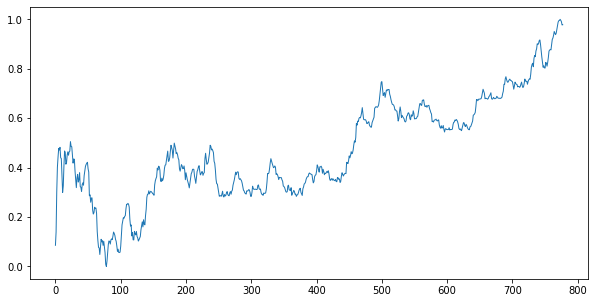

In [86]:
print(splitted_data_pooled[0])
fig = plt.figure(figsize=(10,5))

plt.plot(splitted_data_pooled[10]['MidPrice'], linewidth=1)


In [82]:
class Environment2:
    
    def __init__(self, data, history_t = 10):
        self.data = data    #State variables. 
        self.history_t = history_t
        self.reset()
        
    def reset(self):
        self.t = 0
        self.done = False
        self.profits = 0
        self.positions = []
        self.position_value = 0
        self.history = [0 for _ in range(self.history_t)]
        return [self.position_value] + self.history # obs
    
    def step(self, act):
        reward = 0

        # act = 0: sell, 
        #1: stay, 
        #2: buy
        if (self.t + 1 ==len(self.data)-1):
          act == 0
        max_holding = 10
        if act == 2:
            if len(self.positions)>=max_holding:
              reward = -1
            else:
              self.positions.append(self.data.iloc[self.t, :]['MidPrice'])
        elif act == 0: # sell
            if len(self.positions) == 0:
                reward = -1
            else:
                profits = 0
                for p in self.positions:
                    profits += (self.data.iloc[self.t, :]['MidPrice'] - p)
                reward += profits
                self.profits += profits
                self.positions = []

        if len(self.positions)>=max_holding:
          reward = -1
        # set next time
        self.t += 1
        #print(self.t)
        # if self.t == 49 and self.positions != [] and act != 2:
        #   reward = -1
        self.position_value = 0
        for p in self.positions:
            self.position_value += (self.data.iloc[self.t, :]['MidPrice'] - p)
        self.history.pop(0)
        #self.history.append(self.data.iloc[self.t, :]['MidPrice'] - 0.5)
        self.history.append(self.data.iloc[self.t, :]['MidPrice'] - self.data.iloc[self.t-1, :]['MidPrice'])
        if (self.t==len(self.data)-1):
            self.done=True
            #self.positions = []
            #act = 2   #Force selling at end of period

        # if self.done and self.positions != []:
        #   reward = -1
        # clipping reward
        if reward > 0:
            reward = 1
        elif reward < 0:
            reward = -1
        #print ("t={%d}, done={%str}"%(self.t,self.done))
        #actual_action = act
        return [self.position_value] + self.history, reward, self.done, self.positions # obs, reward, done

In [83]:
class Q_Network(nn.Module):
        
    def __init__(self,obs_len,hidden_size,actions_n):
            
        super(Q_Network,self).__init__()
            
        self.fc_val = nn.Sequential(
            nn.Linear(obs_len, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, actions_n)
        )
        
        
    def forward(self,x):
        h =  self.fc_val(x)
        return (h)

hidden_size=20
input_size=11
output_size=3
USE_CUDA = False
LR = 0.001
Q = Q_Network(input_size, hidden_size, output_size)
Q_ast = copy.deepcopy(Q)
if USE_CUDA:
    Q = Q.cuda()
    print("using Cuda")
loss_function = nn.MSELoss()
optimizer = optim.Adam(list(Q.parameters()), lr=LR)


In [89]:
#epoch_num = 20
memory_size = 7780
batch_size = 778
#gamma = 0.99

memory = []
total_step = 0
total_rewards = []
total_losses = []
epsilon = 1.0
epsilon_decrease = 1e-3
epsilon_min = 0.01
start_reduce_epsilon = 200
train_freq = 10
update_q_freq = 20
gamma = 0.999
show_log_freq = 20
repeat = 5

In [109]:
master_reward = []
#start = time.time()
for epoch in range(200):
    epoch_data = splitted_data_pooled[epoch]
    print("Percentage done: ", 100*epoch/200)
    #epoch_data = pd.DataFrame(epoch_data) 
    env = Environment2(epoch_data)
    step_max = len(env.data)-1
  
    pobs = env.reset()
    step = 0
    done = False
    total_reward = 0
    total_loss = 0
    iterations = []
    log_rewards = []
    log_losses = []
    iteration = 1
    #trading_history = []
    while not done and step < step_max:
        #if done:
        #  trading_history = []  #For pair trading, make sure the stock
        # select action
        pact = np.random.randint(3)
        if np.random.rand() > epsilon:  #Epsilon greedy Exploration
            pact = Q(torch.from_numpy(np.array(pobs, dtype=np.float32).reshape(1, -1)))
            pact = np.argmax(pact.data)
            pact = pact.numpy()
        # if step == step_max - 1:
        #   pact = 2
        # act
        obs, reward, done, inventory = env.step(pact)
        #print("Step max is: ", step_max, "Inventory is: ", inventory)
        # if done is True:
        #     print("action is: ", actual_action, "  Reward is: ", reward, "  Done? ", done)

        # add memory
        memory.append((pobs, pact, reward, obs, done))
        #memory.append((pobs, actual_action, reward, obs, done))
        if len(memory) > memory_size:
            memory.pop(0)

        # train or update q
        if len(memory) == memory_size:
            if total_step % train_freq == 0:
                shuffled_memory = np.random.permutation(memory)
                memory_idx = range(len(shuffled_memory))
                for i in memory_idx[::batch_size]:
                    batch = np.array(shuffled_memory[i:i+batch_size])
                    b_pobs = np.array(batch[:, 0].tolist(), dtype=np.float32).reshape(batch_size, -1)
                    b_pact = np.array(batch[:, 1].tolist(), dtype=np.int32)
                    b_reward = np.array(batch[:, 2].tolist(), dtype=np.int32)
                    b_obs = np.array(batch[:, 3].tolist(), dtype=np.float32).reshape(batch_size, -1)
                    b_done = np.array(batch[:, 4].tolist(), dtype=np.bool)

                    q = Q(torch.from_numpy(b_pobs))
                    q_ = Q_ast(torch.from_numpy(b_obs))
                    maxq = np.max(q_.data.numpy(),axis=1)
                    target = copy.deepcopy(q.data)
                    for j in range(batch_size):
                        target[j, b_pact[j]] = b_reward[j]+gamma*maxq[j]*(not b_done[j])
                    Q.zero_grad()
                    loss = loss_function(q, target)
                    total_loss += loss.data.item()
                    loss.backward()
                    optimizer.step()
                    
            if total_step % update_q_freq == 0:
                Q_ast = copy.deepcopy(Q)
                
            # epsilon
            if epsilon > epsilon_min and total_step > start_reduce_epsilon:
                epsilon -= epsilon_decrease

            # next step
            total_reward += reward
            pobs = obs
            step += 1
            total_step += 1

        total_rewards.append(total_reward)
        master_reward.append(total_rewards)
        total_losses.append(total_loss)

        if (epoch+1) % show_log_freq == 0:
            
            iterations.append(iteration)
            iteration += 1
            log_reward = sum(total_rewards[((epoch+1)-show_log_freq):])/show_log_freq
            log_rewards.append(log_reward)
            log_loss = sum(total_losses[((epoch+1)-show_log_freq):])/show_log_freq
            log_losses.append(log_loss)
            #elapsed_time = time.time()-start
            print('\t'.join(map(str, [epoch+1, epsilon, total_step, log_reward, log_loss])))
            #start = time.time()

Percentage done:  0.0


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



Streaming output truncated to the last 5000 lines.
80	0.00999999999999912	209564	437259.45	8791656.631777037
80	0.00999999999999912	209565	437264.6	8791729.426737433
80	0.00999999999999912	209566	437269.75	8791802.221697832
80	0.00999999999999912	209567	437274.9	8791875.016658228
80	0.00999999999999912	209568	437280.05	8791947.811618626
80	0.00999999999999912	209569	437285.2	8792020.606579024
80	0.00999999999999912	209570	437290.35	8792093.40153942
80	0.00999999999999912	209571	437295.5	8792167.520733526
80	0.00999999999999912	209572	437300.65	8792241.639927631
80	0.00999999999999912	209573	437305.8	8792315.759121737
80	0.00999999999999912	209574	437311.0	8792389.878315842
80	0.00999999999999912	209575	437316.2	8792463.997509947
80	0.00999999999999912	209576	437321.4	8792538.116704052
80	0.00999999999999912	209577	437326.6	8792612.235898158
80	0.00999999999999912	209578	437331.8	8792686.355092263
80	0.00999999999999912	209579	437337.0	8792760.474286368
80	0.00999999999999912	209580	437

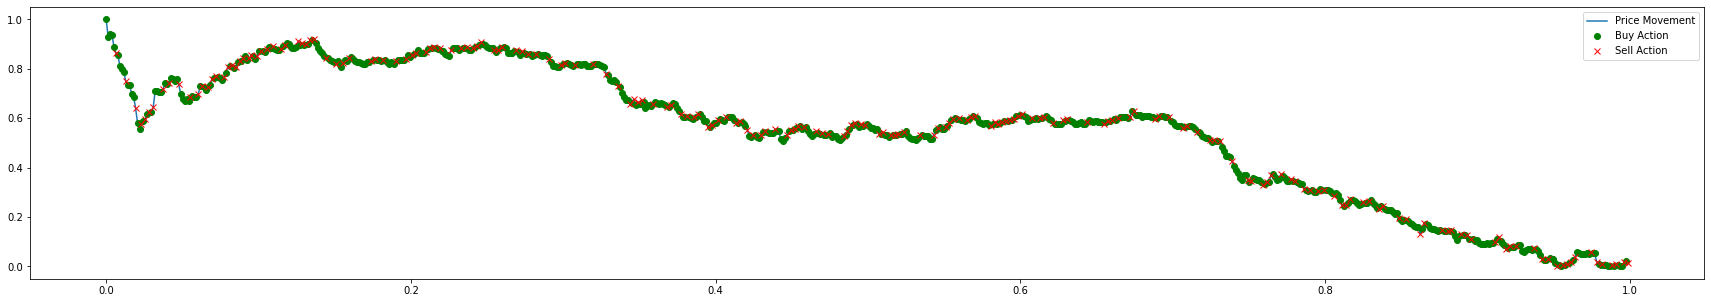

In [116]:
to_test = 201
test_data = splitted_data_pooled[to_test]
test_env = Environment2(test_data)

#test_env = Environment1(X[100])
pobs = test_env.reset()
test_acts = []
test_rewards = []
inventory = []
for _ in range(len(test_env.data)-1):
    
    pact = Q(torch.from_numpy(np.array(pobs, dtype=np.float32).reshape(1, -1)))
    pact = np.argmax(pact.data)
    
    #print(pact.numpy())        
    obs, reward, done, epoch_inventory = test_env.step(pact.numpy())
    inventory.append(len(epoch_inventory))
    test_acts.append(pact.numpy())
    test_rewards.append(reward)

    pobs = obs
test_acts[len(test_env.data)-2] = 0
        
test_profits = test_env.profits

buy_point = []
buy_time = []
sell_point = []
sell_time = []
t = []
for i in range(len(test_acts)):
  t.append(i/len(test_acts))
  if test_acts[i] == 2:
    buy_point.append(splitted_data_pooled[to_test]['MidPrice'].iloc[i])
    buy_time.append(i/len(test_acts))
  if test_acts[i] == 0:
    sell_point.append(splitted_data_pooled[to_test]['MidPrice'].iloc[i])
    sell_time.append(i/len(test_acts))

fig = plt.figure(figsize=(30,5))
plt.plot(t,splitted_data_pooled[to_test]['MidPrice'].iloc[:-1])
plt.plot(buy_time, buy_point, 'o', color='green')
plt.plot(sell_time, sell_point, 'x', color='red');
plt.legend(["Price Movement","Buy Action","Sell Action"])
#print(mark)
plt.show()




In [117]:
print(test_profits)

-2.7319721980886245


In [144]:
#Try all sample path
samplepath_number = []
test_profits = []
actions = []
all_inventory = []
for i in range(0,len(splitted_data_pooled)):
  epoch_action = []
  inventory = []
  test_data = splitted_data_pooled[i]
  test_env = Environment2(test_data)
  pobs = test_env.reset()
  test_acts = []
  test_rewards = []
  print("Percentage done: ", i*100/len(splitted_data_pooled))
  for i in range(len(test_env.data)-1):
      #inventory.append(0)
      pact = Q(torch.from_numpy(np.array(pobs, dtype=np.float32).reshape(1, -1)))
      pact = np.argmax(pact.data)
      test_acts.append(pact.item())
      #print(pact.numpy())        
      # if pact.numpy() == 1:
      #   if i > 0:
      #     inventory[i] = inventory[i-1]+1

      obs, reward, done, epoch_inventory = test_env.step(pact.numpy())
      inventory.append(len(epoch_inventory))
      epoch_action.append(pact.numpy())
      test_rewards.append(reward)

      pobs = obs
  epoch_action[len(test_env.data)-2] = 0
  actions.append(epoch_action)
  all_inventory.append(inventory)        
  test_profits.append(test_env.profits)
  samplepath_number.append(i+1)

Percentage done:  0.0
Percentage done:  0.4048582995951417
Percentage done:  0.8097165991902834
Percentage done:  1.214574898785425
Percentage done:  1.6194331983805668
Percentage done:  2.0242914979757085
Percentage done:  2.42914979757085
Percentage done:  2.834008097165992
Percentage done:  3.2388663967611335
Percentage done:  3.6437246963562755
Percentage done:  4.048582995951417
Percentage done:  4.4534412955465585
Percentage done:  4.8582995951417
Percentage done:  5.2631578947368425
Percentage done:  5.668016194331984
Percentage done:  6.0728744939271255
Percentage done:  6.477732793522267
Percentage done:  6.882591093117409
Percentage done:  7.287449392712551
Percentage done:  7.6923076923076925
Percentage done:  8.097165991902834
Percentage done:  8.502024291497976
Percentage done:  8.906882591093117
Percentage done:  9.31174089068826
Percentage done:  9.7165991902834
Percentage done:  10.121457489878543
Percentage done:  10.526315789473685
Percentage done:  10.931174089068826

(array([ 4.,  8., 16., 17., 23., 33., 35., 29., 40., 20.,  8.,  8.,  3.,
         1.,  2.]),
 array([-1.44129236, -0.93321978, -0.42514719,  0.08292539,  0.59099797,
         1.09907055,  1.60714313,  2.11521571,  2.62328829,  3.13136087,
         3.63943345,  4.14750603,  4.65557861,  5.16365119,  5.67172378,
         6.17979636]),
 <a list of 15 Patch objects>)

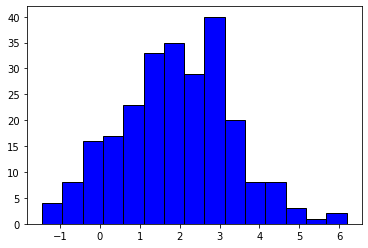

In [129]:
plt.hist(test_profits, color = 'blue', edgecolor = 'black',
         bins = 15)

In [125]:
YEAH = 0
NOOOO = 0
for elem in test_profits:
  if elem >= 0.0:
    YEAH += 1
  else:
    NOOOO -= 1

print("Percentage of Profitting: ", YEAH*100/(len(test_profits)),"%")

Percentage of Profitting:  89.06882591093117 %


#Heat Map (Old State)

In [ ]:
updated_all_inventory = all_inventory
for i in range(len(all_inventory)):
  updated_all_inventory[i].insert(0,0)
  #del updated_all_inventory[i][0]
  del updated_all_inventory[i][len(all_inventory[0])-1]
  #updated_all_inventory[i][len(all_inventory[0])-1] = 0
print(updated_all_inventory[2])
print(len(updated_all_inventory[2]))

In [146]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
#Begin of the day: t = 0
time_spot = 0
inventory_spot = []
price_spot = []
action_spot = []
for i in range(len(actions)):
  price_spot.append(splitted_data_pooled[i]['MidPrice'][time_spot])
  inventory_spot.append(updated_all_inventory[i][time_spot])
  action_spot.append(actions[i][time_spot])
price_quartile = []
for i in range(len(price_spot)):
  if price_spot[i] <= np.quantile(price_spot,0.25):
    price_quartile.append(1)
  elif np.quantile(price_spot,0.25) < price_spot[i] <= np.quantile(price_spot,0.5):
    price_quartile.append(2)
  elif np.quantile(price_spot,0.5) < price_spot[i] <= np.quantile(price_spot,0.75):
    price_quartile.append(3)
  elif np.quantile(price_spot,0.75) < price_spot[i]:
    price_quartile.append(4)
data = np.transpose([price_quartile,inventory_spot,action_spot])  
df = pd.DataFrame(data, columns = ['price', 'inventory','action'])

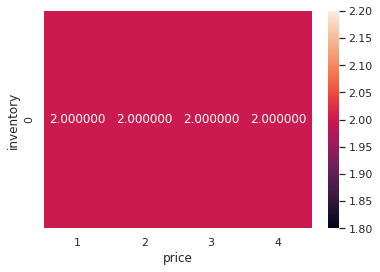

In [147]:
#df = sns.load_dataset("flights")
table = pd.pivot_table(df, values='action', index=['inventory'], columns = ['price'],
                     aggfunc=np.mean)
#print(table)
ax = sns.heatmap(table, annot=True, fmt="f")

In [148]:
#End of the day: t = 776
time_spot = 776
inventory_spot = []
price_spot = []
action_spot = []
for i in range(len(actions)):
  price_spot.append(splitted_data_pooled[i]['MidPrice'][time_spot])
  inventory_spot.append(updated_all_inventory[i][time_spot])
  action_spot.append(actions[i][time_spot])
price_quartile = []
for i in range(len(price_spot)):
  if price_spot[i] <= np.quantile(price_spot,0.25):
    price_quartile.append(1)
  elif np.quantile(price_spot,0.25) < price_spot[i] <= np.quantile(price_spot,0.5):
    price_quartile.append(2)
  elif np.quantile(price_spot,0.5) < price_spot[i] <= np.quantile(price_spot,0.75):
    price_quartile.append(3)
  elif np.quantile(price_spot,0.75) < price_spot[i]:
    price_quartile.append(4)
data = np.transpose([price_quartile,inventory_spot,action_spot])  
df = pd.DataFrame(data, columns = ['price', 'inventory','action'])

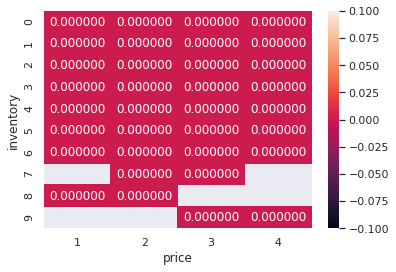

In [149]:
#df = sns.load_dataset("flights")
table = pd.pivot_table(df, values='action', index=['inventory'], columns = ['price'],
                     aggfunc=np.mean)
#print(table)
ax = sns.heatmap(table, annot=True, fmt="f")

In [211]:
#Near end of the day: t = 720 to t = 776
#time_spot = 25
inventory_spot = []
price_spot = []
action_spot = []
for i in range(len(actions)):
  for j in range(720,776):
    price_spot.append(splitted_data_pooled[i]['MidPrice'][j])
    inventory_spot.append(updated_all_inventory[i][j])
    action_spot.append(actions[i][j])
price_quartile = []
print("Loaded")
first_quantile = np.quantile(price_spot,0.1)
second_quantile = np.quantile(price_spot,0.5)
third_quantile = np.quantile(price_spot,0.9)
print("Done")
for i in range(len(price_spot)):
  #print("Percent complete: ", i/len(price_spot))
  if price_spot[i] <= first_quantile:
    price_quartile.append(1)
  elif first_quantile < price_spot[i] <= second_quantile:
    price_quartile.append(2)
  elif second_quantile < price_spot[i] <= third_quantile:
    price_quartile.append(3)
  elif third_quantile < price_spot[i]:
    price_quartile.append(4)
data = np.transpose([price_quartile,inventory_spot,action_spot])  
df = pd.DataFrame(data, columns = ['price', 'inventory','action'])

Loaded
Done


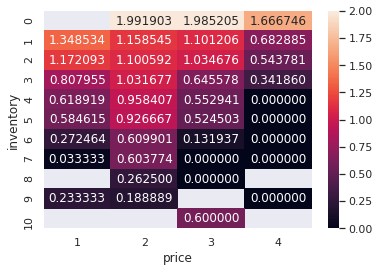

In [213]:

table = pd.pivot_table(df, values='action', index=['inventory'], columns = ['price'],
                     aggfunc=np.mean)


#print(table)
ax = sns.heatmap(table[:], annot=True, fmt="f",vmin=0, vmax=2)

In [214]:
#Near beginning of the day: t = 0 to t = 50
#time_spot = 25
inventory_spot = []
price_spot = []
action_spot = []
for i in range(len(actions)):
  for j in range(0,50):
    price_spot.append(splitted_data_pooled[i]['MidPrice'][j])
    inventory_spot.append(updated_all_inventory[i][j])
    action_spot.append(actions[i][j])
price_quartile = []
print("Loaded")
first_quantile = np.quantile(price_spot,0.1)
second_quantile = np.quantile(price_spot,0.5)
third_quantile = np.quantile(price_spot,0.9)
print("Done")
for i in range(len(price_spot)):
  #print("Percent complete: ", i/len(price_spot))
  if price_spot[i] <= first_quantile:
    price_quartile.append(1)
  elif first_quantile < price_spot[i] <= second_quantile:
    price_quartile.append(2)
  elif second_quantile < price_spot[i] <= third_quantile:
    price_quartile.append(3)
  elif third_quantile < price_spot[i]:
    price_quartile.append(4)
data = np.transpose([price_quartile,inventory_spot,action_spot])  
df = pd.DataFrame(data, columns = ['price', 'inventory','action'])

Loaded
Done


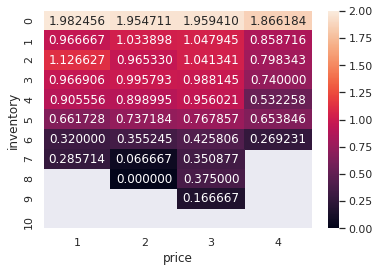

In [215]:

table = pd.pivot_table(df, values='action', index=['inventory'], columns = ['price'],
                     aggfunc=np.mean)
table = remove_outlier(table)

#print(table)
ax = sns.heatmap(table[:], annot=True, fmt="f",vmin=0, vmax=2)

In [161]:
#Middle of the day: t = 300 to t = 500
#time_spot = 25
inventory_spot = []
price_spot = []
action_spot = []
for i in range(len(actions)):
  for j in range(300,500):
    price_spot.append(splitted_data_pooled[i]['MidPrice'][j])
    inventory_spot.append(updated_all_inventory[i][j])
    action_spot.append(actions[i][j])
price_quartile = []
print("Loaded")
first_quantile = np.quantile(price_spot,0.1)
second_quantile = np.quantile(price_spot,0.5)
third_quantile = np.quantile(price_spot,0.9)
print("Done")
for i in range(len(price_spot)):
  #print("Percent complete: ", i/len(price_spot))
  if price_spot[i] <= first_quantile:
    price_quartile.append(1)
  elif first_quantile < price_spot[i] <= second_quantile:
    price_quartile.append(2)
  elif second_quantile < price_spot[i] <= third_quantile:
    price_quartile.append(3)
  elif third_quantile < price_spot[i]:
    price_quartile.append(4)
data = np.transpose([price_quartile,inventory_spot,action_spot])  
df = pd.DataFrame(data, columns = ['price', 'inventory','action'])

Loaded
Done


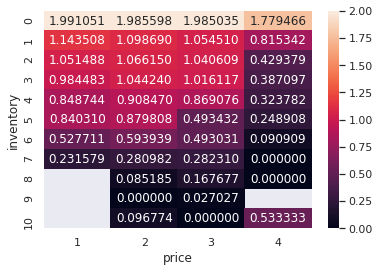

In [195]:
table = pd.pivot_table(df, values='action', index=['inventory'], columns = ['price'],
                      aggfunc=np.mean)
table = remove_outlier(table)
table = remove_outlier(table)


#print(table)
ax = sns.heatmap(table[:], annot=True, fmt="f",vmin=0, vmax=2)